In [1]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du
import Pacejka52_glSA as pa52gl
import Pacejka52_params_comp as pa52pa

sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_Indy as pa
import Params_fit_at_Pa52 as pam

i=500
Sx = np.linspace(0,1,i)
Sy = np.linspace(0,0.3,i)
Fz0 = 3114
IA = 0

iter = 500 #
Fz = np.linspace(1500,5000,iter)


4665.109756333515
4664.16757889698
4663.925880835989


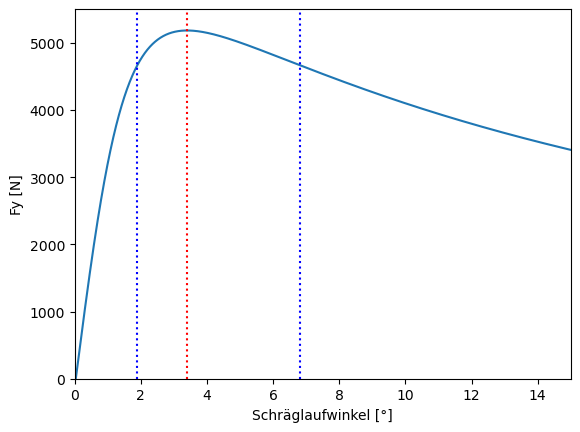

In [2]:
#Kriterien SA

Fz = 3000
Sy = np.linspace(0,0.3,10000)
Sy1 = np.linspace(0,15,10000)
Fy = pa52.Pacejka52_long(Fz,Sy,IA,Fz0)[0]
Fmax = np.max(Fy)

FmaxS = np.argmax(Fy) / 10000 * 15
left = 0
for j in range(0,len(Fy)):
    if Fy[j] < Fmax*0.9:
        left +=1
    else:
        break
right = 0
for j in range(left+1,len(Fy)):
    if Fy[j] > Fmax*0.9:
        right +=1
    else:
        break

l = left/10000 *15
r = (left + right)/10000 *15
print(Fy[left])
print(Fy[(left + right)])
print(Fmax * 0.9)
plt.plot(Sy1,Fy)
plt.xlim(0,15)
plt.ylim(0,5500)
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')


plt.axvline(x = FmaxS, color='r', linestyle='dotted')
plt.axvline(x = l, color='b', linestyle='dotted')
plt.axvline(x = r, color='b', linestyle='dotted')

Text(0.5, 0, 'Schlupf [%]')

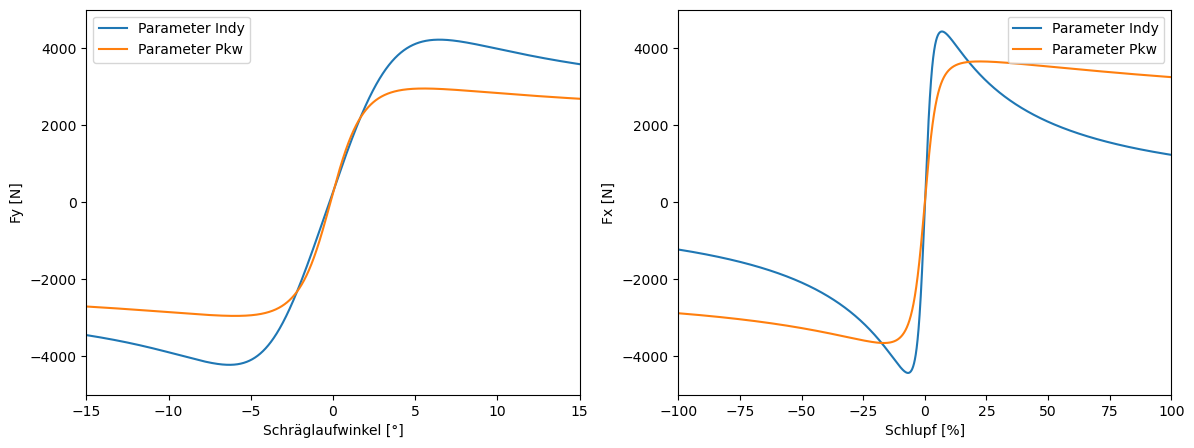

In [18]:
#Vergleich Rennreifen - Straßenreifen
Fz = 2500
Sy = np.linspace(-0.3,0.3,10000)
Sy_plot = np.linspace(-15,15,10000)
IA = 0
Fz0 = 3114
Fy_indy = pa52pa.Pacejka52_lat(Fz,Sy,IA,Fz0,'INDY')[0]
Fy_pkw = pa52pa.Pacejka52_lat(Fz,Sy,IA,Fz0,'PKW')[0]


fig,ax = plt.subplots(1,2, figsize = [14,5])

ax[0].plot(Sy_plot,Fy_indy, label = "Parameter Indy")
ax[0].plot(Sy_plot,Fy_pkw, label = "Parameter Pkw")
ax[0].set_ylim(-5000,5000)
ax[0].set_xlim(-15,15)
ax[0].legend()
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [°]')

Sx = np.linspace(-1,1,10000)
Sx_plot = np.linspace(-100,100,10000)
Fx_indy = pa52pa.Pacejka52_long(Fz,Sx,IA,Fz0,'INDY')[0]
Fx_pkw = pa52pa.Pacejka52_long(Fz,Sx,IA,Fz0,'PKW')[0]

ax[1].plot(Sx_plot,Fx_indy, label = "Parameter Indy")
ax[1].plot(Sx_plot,Fx_pkw, label = "Parameter Pkw")
ax[1].set_ylim(-5000,5000)
ax[1].set_xlim(-100,100)
ax[1].legend()
ax[1].set_ylabel('Fx [N]')
ax[1].set_xlabel('Schlupf [%]')

Text(0.5, 1.0, 'Fy - alpha (Fz = 3000N, Indy Parameter)')

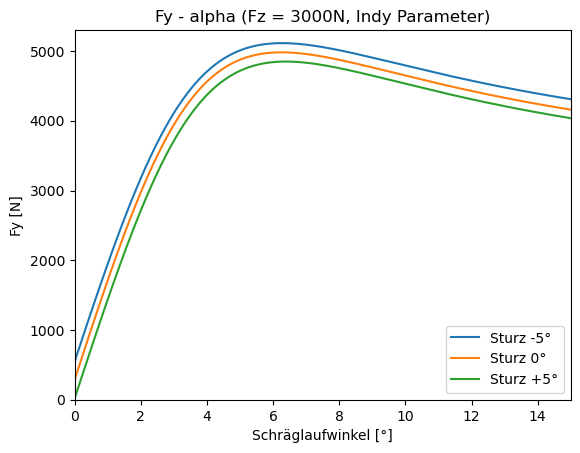

In [8]:
#Sturz
Fz = 3000
Sy = np.linspace(0,0.3,10000)
Sy1 = np.linspace(0,15,10000)
Fz0 = 3114
F1 = pa52pa.Pacejka52_lat(Fz,Sy,5,Fz0,'INDY')[0]
F2 = pa52pa.Pacejka52_lat(Fz,Sy,0,Fz0,'INDY')[0]
F3 = pa52pa.Pacejka52_lat(Fz,Sy,-5,Fz0,'INDY')[0]


plt.figure(1,)# figsize = [12,8])
plt.plot(Sy1,F1, label = 'Sturz -5°')
plt.plot(Sy1,F2, label = 'Sturz 0°')
plt.plot(Sy1,F3, label = 'Sturz +5°')
plt.legend()
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')
plt.xlim(0,15)
plt.ylim(0,5300)
plt.title('Fy - alpha (Fz = 3000N, Indy Parameter)')




Text(0, 0.5, 'Fy [N]')

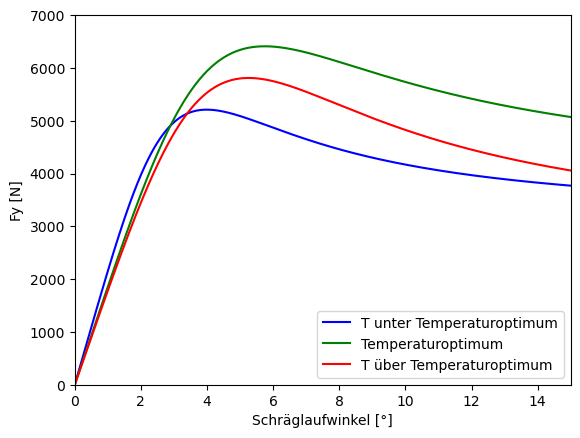

In [24]:
#Temperatur
Fz = 4000
Sy_plt = np.linspace(0,15,len(Sy))
F_kalt = pa52.Pacejka5_lat_pa(Sy,Fz, -13.10763555, 1.5991035, -1.30244708 , -1.89562919)
F_opt = pa52.Pacejka5_lat_pa(Sy,Fz, -9.10763555, 1.5991035, -1.60244708 , -1.89562919)
F_warm = pa52.Pacejka5_lat_pa(Sy,Fz, -9.10763555, 1.6991035, -1.45244708 , -1.89562919)


plt.figure()

plt.plot(Sy_plt, F_kalt, 'b', label = 'T unter Temperaturoptimum')
plt.plot(Sy_plt, F_opt, 'g', label = 'Temperaturoptimum')
plt.plot(Sy_plt, F_warm, 'r', label = 'T über Temperaturoptimum')
plt.xlim(0,15)
plt.ylim(0,7000)
plt.legend()
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')

Text(0, 0.5, 'Fy [N]')

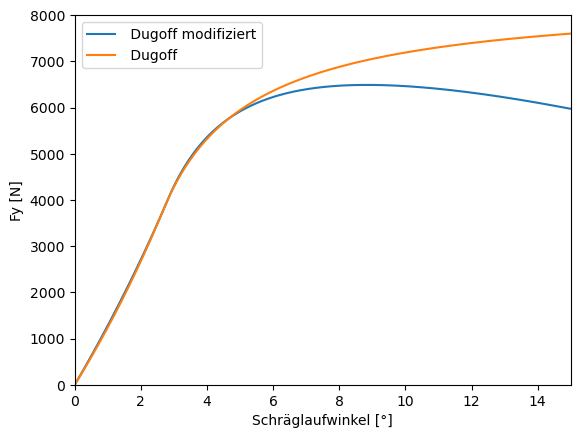

In [19]:
#Dugoff
Fz = 4000
Cs_lat = 1.94120979e-01
Ca_lat = 4.07519670e+03
mu_lat =  1.42305583e-01
Fy = du.dugoff_lat(Sx,Sy,Fz,Cs_lat,Ca_lat,mu_lat)
Fy1 = du.dugoff_lat_mod(Sx,Sy,4000,2,58000,1.9)
Sy_plt = np.linspace(0,15,len(Sy))

plt.plot(Sy_plt,Fy, label = ' Dugoff modifiziert')
plt.plot(Sy_plt,Fy1, label = ' Dugoff')
plt.xlim(0,15)
plt.ylim(0,8000)
plt.legend()
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')

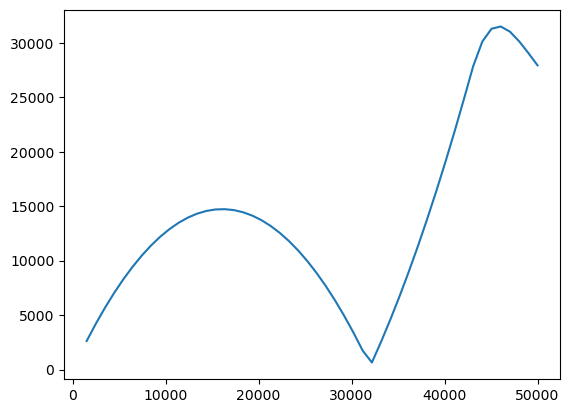

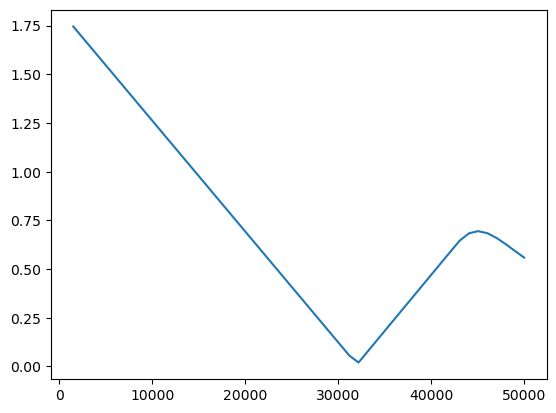

In [13]:
#Reibschlussbeiwert

Fz = np.linspace(1500,50000,50)
Sy = np.linspace(0,0.3,10000)
Sy1 = np.linspace(0,15,10000)
Fz0 = 3114

F = np.zeros(len(Fz))
F_reib = np.zeros(len(Fz))
for i in range(len(F)):

    F[i] = np.max(pa52pa.Pacejka52_lat(Fz[i],Sy,0,Fz0,'INDY')[0])
    F_reib[i] = np.max(pa52pa.Pacejka52_lat(Fz[i],Sy,0,Fz0,'INDY')[0]) / Fz[i]

plt.figure(1)
plt.plot(Fz,F)

plt.figure(2)
plt.plot(Fz, F_reib)




Text(0.5, 1.0, 'laterale Reifenmodelle gefittet auf ein Pacejka 5.2 (Fz = 4000 N)')

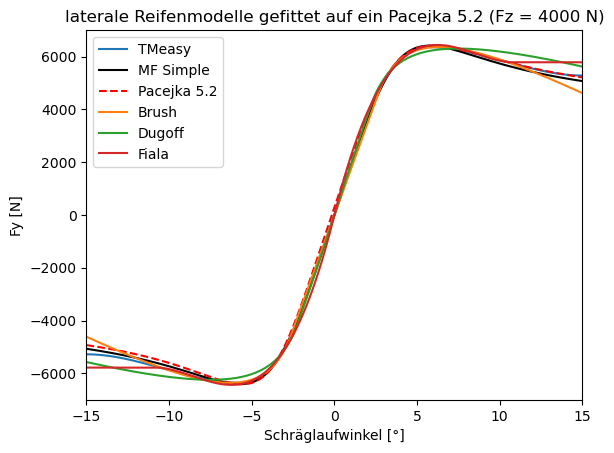

In [55]:
#alle fittings übereinander geplottet

Fz = 4000
Fz0 = 3114
Sx = np.linspace(-1,1,1000)
Sy = np.linspace(-0.3,0.3,1000)

Sy_plt = np.linspace(-15,15,1000)
DFY_lat = 9.01646321e+04
FMY_lat = 6.39266085e+03
FSY_lat = 5.30979506e+03
SMY_lat = 1.15048404e-01
SSY_lat = 3.01495645e-01
SMX_lat = 3.54195854e+00

Fy_tm = tm.calcFY(Sx, Sy, DFY_lat, FMY_lat, FSY_lat, SMY_lat, SSY_lat,SMX_lat)
plt.plot(Sy_plt,Fy_tm, label = 'TMeasy')

B_lat = 9.10763555
C_lat =1.5991035
D_lat = 1.60244708 
E_lat = -1.89562919
Fy_pa5 = pa52.Pacejka5_lat_pa(Sy,Fz, B_lat, C_lat, D_lat , E_lat)
plt.plot(Sy_plt,Fy_pa5, 'k', label = 'MF Simple')

Fy_pa52 = pa52pa.Pacejka52_lat(Fz,Sy,0,Fz0,'INDY')[0]
plt.plot(Sy_plt,Fy_pa52,'r--', label = 'Pacejka 5.2')

mu_b_lat = 1.58991258e+00
Ca_b_lat = 1.05121281e+06
lam_b_lat = 5.74790914e-02
Fy_br  = br.brush_lat(Sy, Fz, mu_b_lat, Ca_b_lat, lam_b_lat)
plt.plot(Sy_plt,Fy_br, label = 'Brush')

Cs_lat = 2.74289218e-01
Ca_lat = 6.16477615e+03
mu_lat =  1.43548745e-01
Sxxx = np.linspace(0,0.1,1000)
Fy_du = du.dugoff_lat(Sxxx,Sy,Fz,Cs_lat,Ca_lat,mu_lat)
plt.plot(Sy_plt,Fy_du, label = 'Dugoff')

fi_C_lat = -1.26902260e+05
fi_mu1 = -2.32752807e+00
fi_mu2 = -1.44561563e+00
Fy_fi = fi.fiala_lat(Sy,Fz,fi_C_lat,fi_mu1,fi_mu2)
plt.plot(Sy_plt,Fy_fi, label = 'Fiala')

plt.legend()
plt.xlim(-15,15)
plt.ylim(-7000,7000)
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')
plt.title('laterale Reifenmodelle gefittet auf ein Pacejka 5.2 (Fz = 4000 N)')

Text(0.5, 1.0, 'longitudinale Reifenmodelle gefittet auf ein Pacejka 5.2 (Fz = 4000 N)')

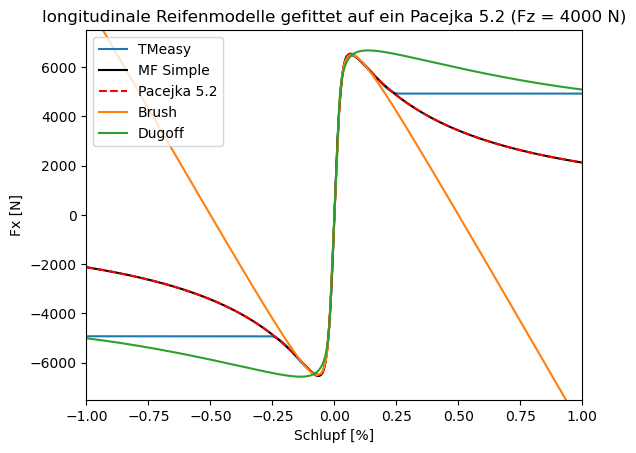

In [54]:
#alle fittings übereinander geplottet

Fz = 4000
Fz0 = 3114
Sx = np.linspace(-1,1,1000)
Sy = np.linspace(-0.3,0.3,1000)
DFX_long = 2.73698918e+05
FMX_long = 6.49227443e+03
FSX_long = 4.92427382e+03
SMX_long = 5.65704982e-02
SSX_long = 2.59229223e-01
SMY_long = 5.03325089e+00

Fx_tm = tm.calcFx( Sx, Sy, DFX_long, FMX_long, FSX_long, SMX_long,SSX_long, SMY_long)
plt.plot(Sx,Fx_tm, label = 'TMeasy')

B_long =19.7526835
C_long =1.99999146
D_long =1.63455163
E_long = 0.75471735
Fx_pa5 = pa52.Pacejka5_long_pa(Sx,Fz, B_long, C_long, D_long , E_long)
plt.plot(Sx,Fx_pa5,'k', label = 'MF Simple')

Fx_pa52 = pa52pa.Pacejka52_long(Fz,Sx,0,Fz0,'INDY')[0]
plt.plot(Sx,Fx_pa52,'r--', label = 'Pacejka 5.2')

mu_b_long  = 1.62344260e+00
kt_b_long  = 3.63683914e+06
lam_b_long = 3.10083340e-02
Fx_br  = br.brush_long(Sx, Fz, mu_b_long, kt_b_long, lam_b_long)
plt.plot(Sx,Fx_br, label = 'Brush')


Cs_long = 1.58443682e+05
Ca_long = -1.59200977e+00
mu_long = 1.24651131e+00
Syyy = np.linspace(0.001,0.2,1000)
Fx_du = du.dugoff_long(Sx,Syyy,Fz,Cs_long,Ca_long,mu_long)
plt.plot(Sx,Fx_du, label = 'Dugoff')

plt.legend(loc = 'upper left')
plt.xlim(-1,1)
plt.ylim(-7500,7500)
plt.xlabel('Schlupf [%]')
plt.ylabel('Fx [N]')
plt.title('longitudinale Reifenmodelle gefittet auf ein Pacejka 5.2 (Fz = 4000 N)')

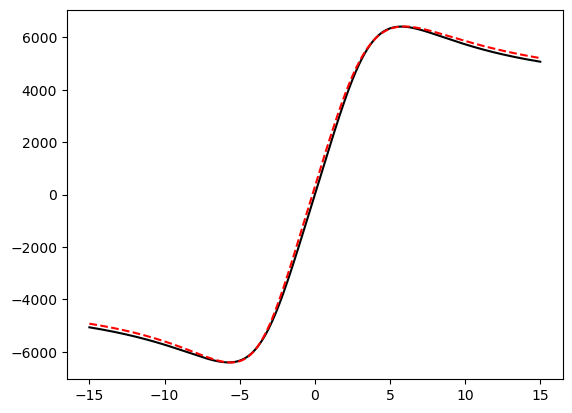